# Predicting Air Pollution

Health Impacts
The health impact of air pollution is quite severe. It is estimated that 29% of cardiopulmonary deaths and 40% of lung cancer deaths are attributable to air pollution. Mothers and young children are especially vulnerable. During winter months (when pollution is highest) fetal deaths increase 3.5 times and birth defects are more common.
A recent report from UNICEF found the cost of treating air pollution related illnesses and indirect costs of missed work to be 5.4 billion MNT ($2.2 million USD) per year.


Making personal observations is all fine and good, but it doesn’t give a rigorous understanding of air pollution. 

Why PM2.5? 
First, it is one of the most dangerous forms of air pollution. Second, it is the form of pollution tracked by the US State Department at the US Embassy, and they make their data available to the public in a very easy to use format.


Benefits of Predicting
As with any project, the benefits must be clear from the start. Here are what I believe can be some benefits of predicting PM2.5 levels:
1.	Knowing mask/air filtration needs for certain times of day. (Just like we ask ourselves whether we should bring an umbrella if it will rain.)
2.	Knowing whether it will be safe to open the windows today. Often people only look at the pollution levels once a day (if at all). Simply looking out the window isn’t a reliable indicator of pollution.
3.	Knowing if it is a good idea to go outside or to the park, and at what time. Also knowing what part of the city will have cleaner air at a certain time of day can be valuable.


The goal:
The goal of this project is to provide citizens a tool to use in protecting themselves and their families from air pollution.


First we will import the relevant libraries that we will use for the given task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AirQualityData.txt')

In [3]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


We can see that we miss values at column 'pm2.5', which is our target, so it will be best if we drop that missing rows.

In [5]:
df = df.dropna(axis = 0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41757 non-null  int64  
 1   year    41757 non-null  int64  
 2   month   41757 non-null  int64  
 3   day     41757 non-null  int64  
 4   hour    41757 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    41757 non-null  int64  
 7   TEMP    41757 non-null  float64
 8   PRES    41757 non-null  float64
 9   cbwd    41757 non-null  object 
 10  Iws     41757 non-null  float64
 11  Is      41757 non-null  int64  
 12  Ir      41757 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.5+ MB


In [7]:
df = df.drop('No', axis = 1)

In [8]:
df.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


C:\Users\Simka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


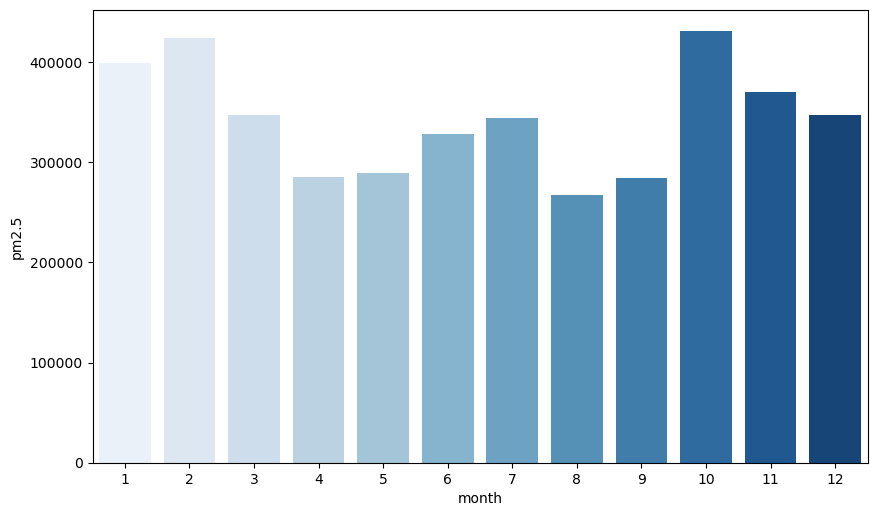

In [9]:
pm_bymonth = df['pm2.5'].groupby(df.month).sum().sort_values(ascending = True)
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi = 100)
ax = sns.barplot( pm_bymonth.index,pm_bymonth, palette='Blues')

C:\Users\Simka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


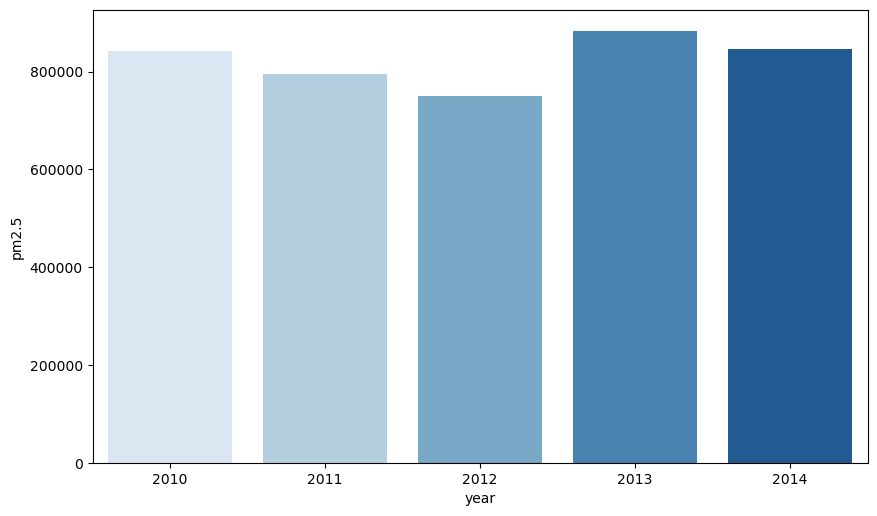

In [10]:
pm_byyear = df['pm2.5'].groupby(df.year).sum().sort_values(ascending = True)
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi = 100)
ax = sns.barplot( pm_byyear.index,pm_byyear, palette='Blues')

C:\Users\Simka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


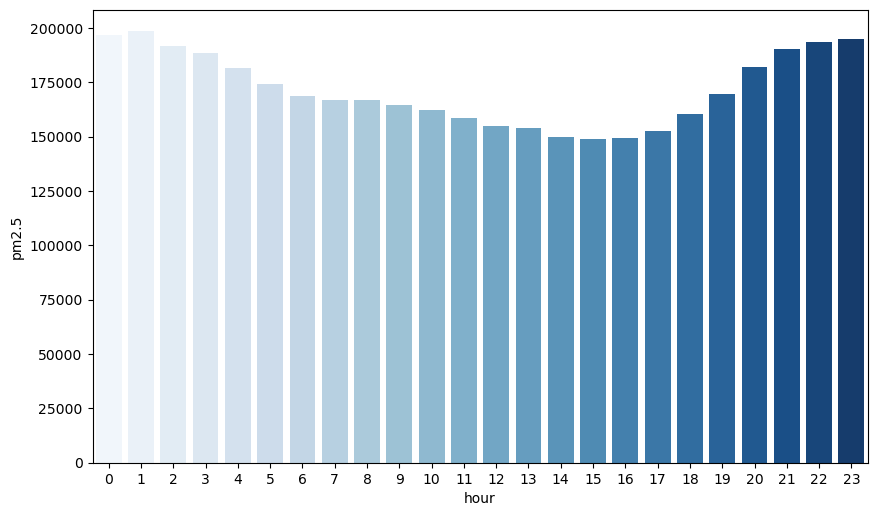

In [11]:
pm_byhour = df['pm2.5'].groupby(df.hour).sum().sort_values(ascending = True)
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
ax = sns.barplot( pm_byhour.index, pm_byhour, palette='Blues')

C:\Users\Simka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


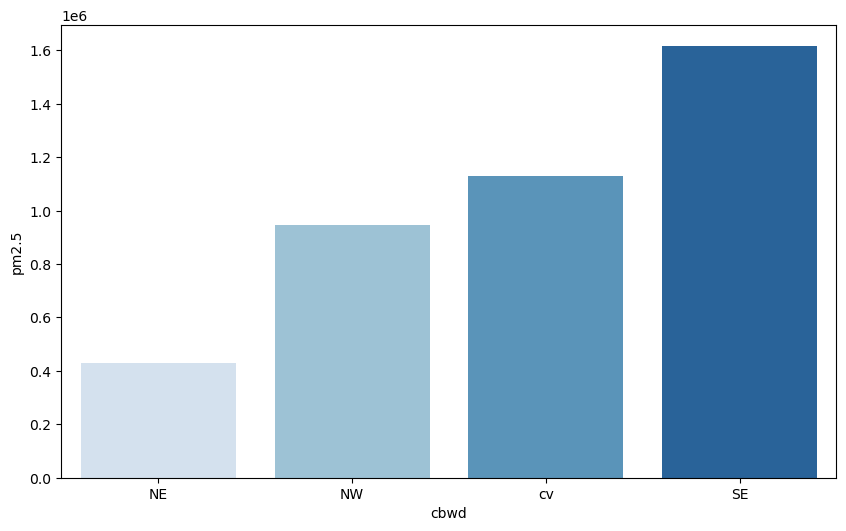

In [12]:
pm_by_wind_direction = df['pm2.5'].groupby(df.cbwd ).sum().sort_values(ascending = True)
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
ax = sns.barplot( pm_by_wind_direction.index, pm_by_wind_direction, palette='Blues')

In [13]:
df['cbwd'].value_counts()

SE    14573
NW    13484
cv     8944
NE     4756
Name: cbwd, dtype: int64

In [14]:
#df['cbwd']= df['cbwd'].str.upper()

In [15]:
#df['cbwd'].unique()

In [16]:
def convert(day,month,year):
    return f'{day}-{month}-{year}'

In [17]:
df['date']  = np.vectorize(convert)(df['day'],
                                    df['month'],
                                    df ['year'])

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df['Day'] =df['date'].dt.day_name()

C:\Users\Simka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


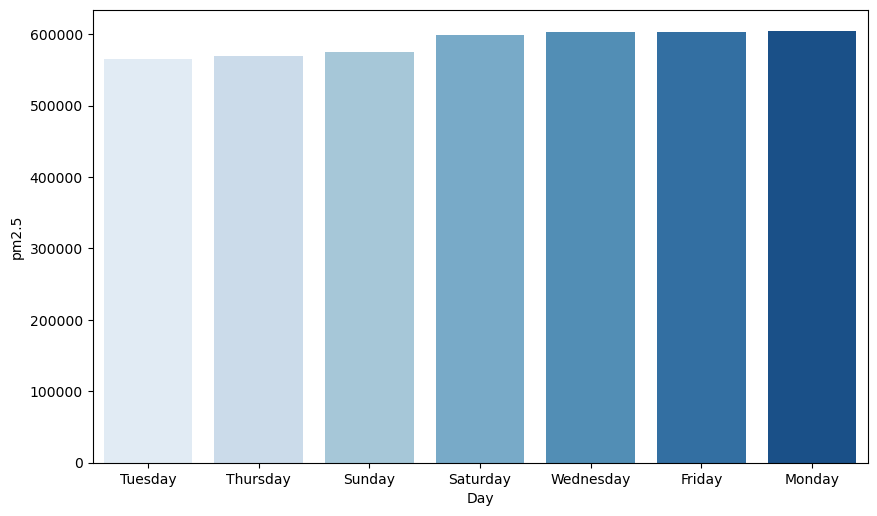

In [20]:
pm_by_day = df['pm2.5'].groupby(df.Day ).sum().sort_values(ascending = True)
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
ax = sns.barplot( pm_by_day.index, pm_by_day, palette='Blues')

In [21]:
df.columns

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd',
       'Iws', 'Is', 'Ir', 'date', 'Day'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of pm2.5')

<Figure size 1000x500 with 0 Axes>

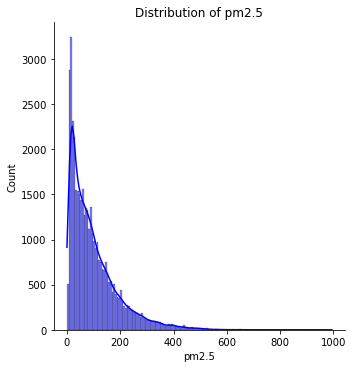

In [22]:
plt.figure(figsize=(10,5),dpi=100)
sns.displot(df['pm2.5'], kde = True, color = 'b')
plt.title('Distribution of pm2.5')

In [23]:
df[df['pm2.5']==0]

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,Day
24034,2012,9,28,10,0.0,-5,20.0,1020.0,NW,139.48,0,0,2012-09-28,Friday
24039,2012,9,28,15,0.0,-10,24.0,1017.0,NW,192.68,0,0,2012-09-28,Friday


In [24]:
df = df.drop([24034,24039], axis =0)

In [25]:
len(df)

41755

In [26]:
df.corr()['pm2.5'].sort_values(ascending= True)

Iws     -0.247695
TEMP    -0.090497
Ir      -0.051377
PRES    -0.047273
month   -0.024033
hour    -0.023110
year    -0.014692
Is       0.019262
day      0.082867
DEWP     0.171397
pm2.5    1.000000
Name: pm2.5, dtype: float64

In [27]:
def to_timestamp(year,month,day,hour):
    return datetime(year,month,day,hour)

In [28]:
#apply the above function to the required columns
from datetime import datetime
df['time'] = df[['year','month','day','hour']].apply(
    lambda t: to_timestamp(t['year'],t['month'],t['day'],t['hour']),
    axis=1)
#drop the redundancy
df = df.drop(['year','month','day','hour', 'date', 'Day'],axis=1)
#time is the new index
df = df.set_index('time')

In [29]:
df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
time,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [30]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pm2.5,41755.0,98.617938,92.050062,1.00,29.00,72.00,137.00,994.00
DEWP,41755.0,1.750617,14.433851,-40.00,-10.00,2.00,15.00,28.00
TEMP,41755.0,12.401102,12.175318,-19.00,2.00,14.00,23.00,42.00
PRES,41755.0,1016.442797,10.300964,991.00,1008.00,1016.00,1025.00,1046.00
Iws,41755.0,23.859936,49.608579,0.45,1.79,5.37,21.91,565.49
Is,41755.0,0.055347,0.778893,0.00,0.00,0.00,0.00,27.00
Ir,41755.0,0.194875,1.418199,0.00,0.00,0.00,0.00,36.00


In [31]:
df['pm2.5_log'] = np.log10(df['pm2.5'])

Text(0.5, 1.0, 'Distribution of pm2.5_log')

<Figure size 1000x500 with 0 Axes>

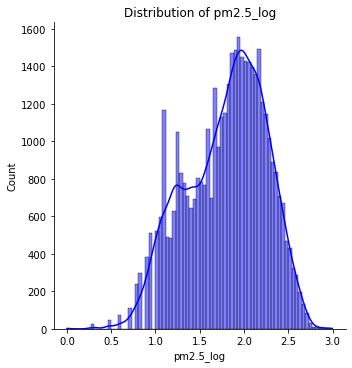

In [32]:
plt.figure(figsize=(10,5),dpi=100)
sns.displot(df['pm2.5_log'], kde = True, color = 'b')
plt.title('Distribution of pm2.5_log')

In [33]:
df_log = df.drop('pm2.5', axis =1)

<AxesSubplot:xlabel='cbwd', ylabel='pm2.5_log'>

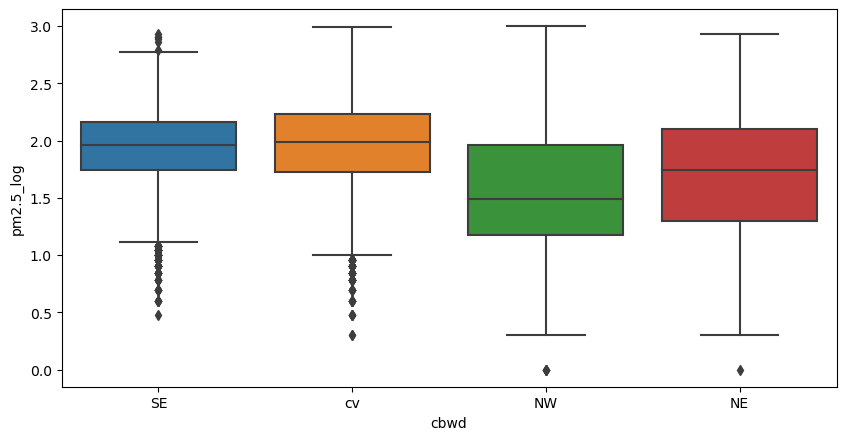

In [51]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(x='cbwd',y='pm2.5_log',data=df_log)


In [54]:
df_log[(df_log['cbwd'] == 'SE') & (df_log['pm2.5_log'] <1)]

,DEWP,TEMP,PRES,cbwd,Iws,pm2.5_log
time,,,,,,
2010-07-06 14:00:00,7,1.602060,999.0,SE,3.13,0.954243
2010-07-06 15:00:00,6,1.612784,999.0,SE,7.15,0.845098
2010-09-18 15:00:00,13,1.255273,1014.0,SE,1.79,0.778151
2010-10-26 17:00:00,-14,0.778151,1036.0,SE,3.13,0.903090
2011-04-02 19:00:00,-7,1.041393,1025.0,SE,10.28,0.698970
...,...,...,...,...,...,...
2014-08-25 18:00:00,9,1.477121,1009.0,SE,7.16,0.903090
2014-09-08 16:00:00,7,1.462398,1008.0,SE,1.79,0.602060
2014-10-13 17:00:00,-5,1.176091,1023.0,SE,3.58,0.903090


In [60]:
outliers1 = df_log[(df_log['cbwd'] == 'SE') & (df_log['pm2.5_log'] <1)]

In [61]:
df_log.drop(outliers1, axis = 0)

KeyError: "['DEWP' 'TEMP' 'PRES' 'cbwd' 'Iws' 'pm2.5_log'] not found in axis"

In [55]:
df_log[(df_log['cbwd'] == 'cv') & (df_log['pm2.5_log'] <1)]

,DEWP,TEMP,PRES,cbwd,Iws,pm2.5_log
time,,,,,,
2010-07-06 11:00:00,6,1.579784,1002.0,cv,1.79,0.602060
2010-07-06 12:00:00,5,1.579784,1001.0,cv,3.58,0.301030
2010-07-06 13:00:00,6,1.602060,1000.0,cv,6.71,0.477121
2010-10-26 14:00:00,-14,0.903090,1038.0,cv,0.89,0.954243
2010-10-30 15:00:00,-4,1.301030,1025.0,cv,2.68,0.954243
...,...,...,...,...,...,...
2014-10-13 14:00:00,-9,1.230449,1025.0,cv,1.79,0.903090
2014-11-02 22:00:00,-5,0.698970,1022.0,cv,0.89,0.845098
2014-11-06 18:00:00,-8,0.698970,1030.0,cv,0.89,0.778151


In [34]:
df_log.corr()['pm2.5_log'].sort_values(ascending= True)

Iws         -0.356371
PRES        -0.159616
Ir          -0.049577
TEMP         0.018990
Is           0.033357
DEWP         0.313882
pm2.5_log    1.000000
Name: pm2.5_log, dtype: float64

<AxesSubplot:>

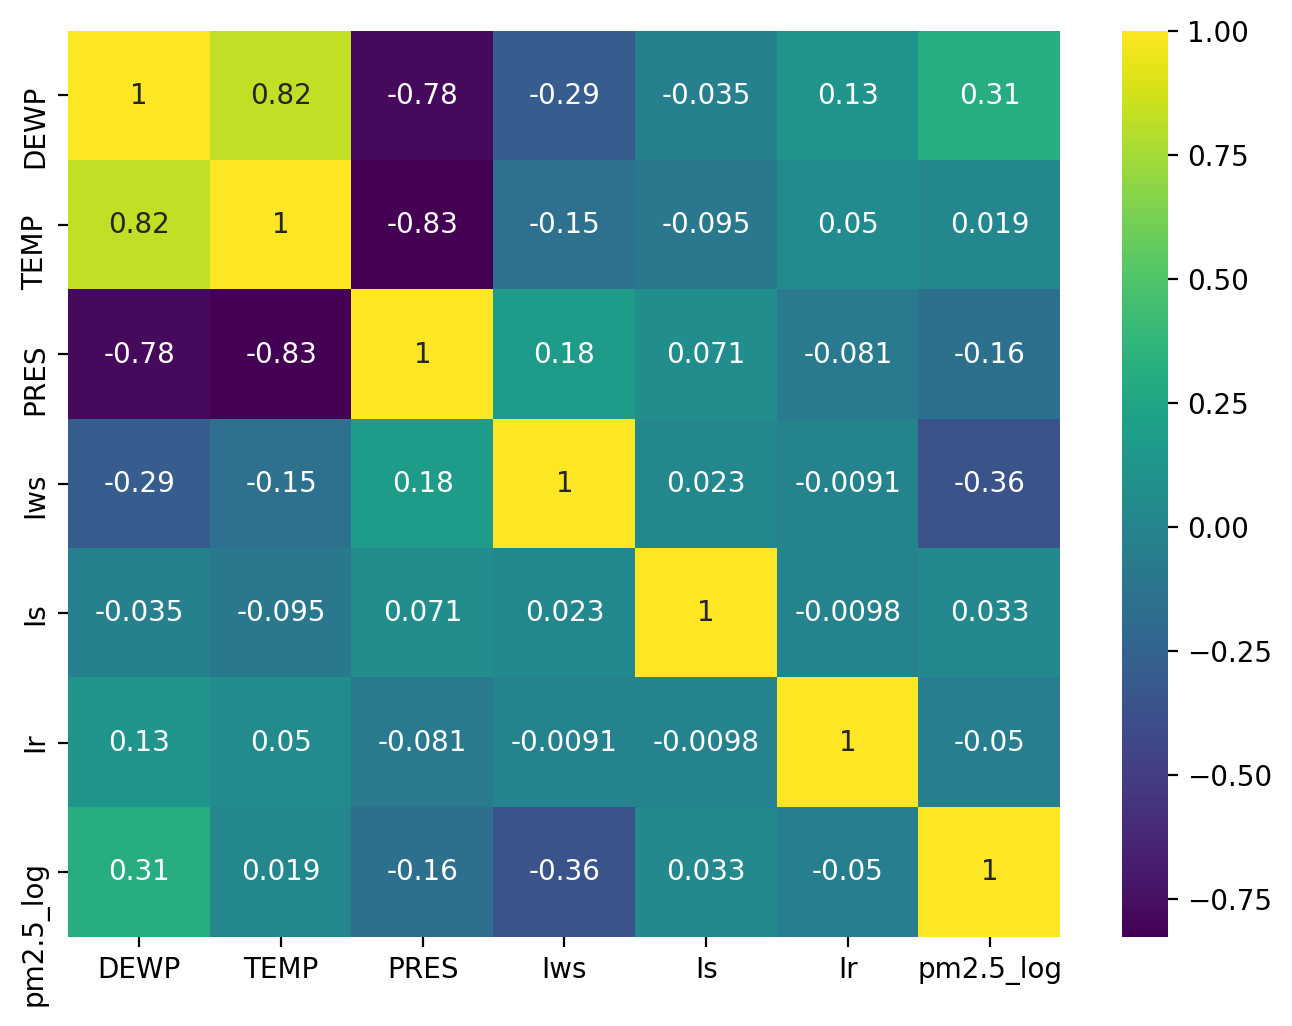

In [35]:
plt.figure (figsize = (8,6), dpi=200)
sns.heatmap(df_log.corr(),cmap='viridis', annot=True)

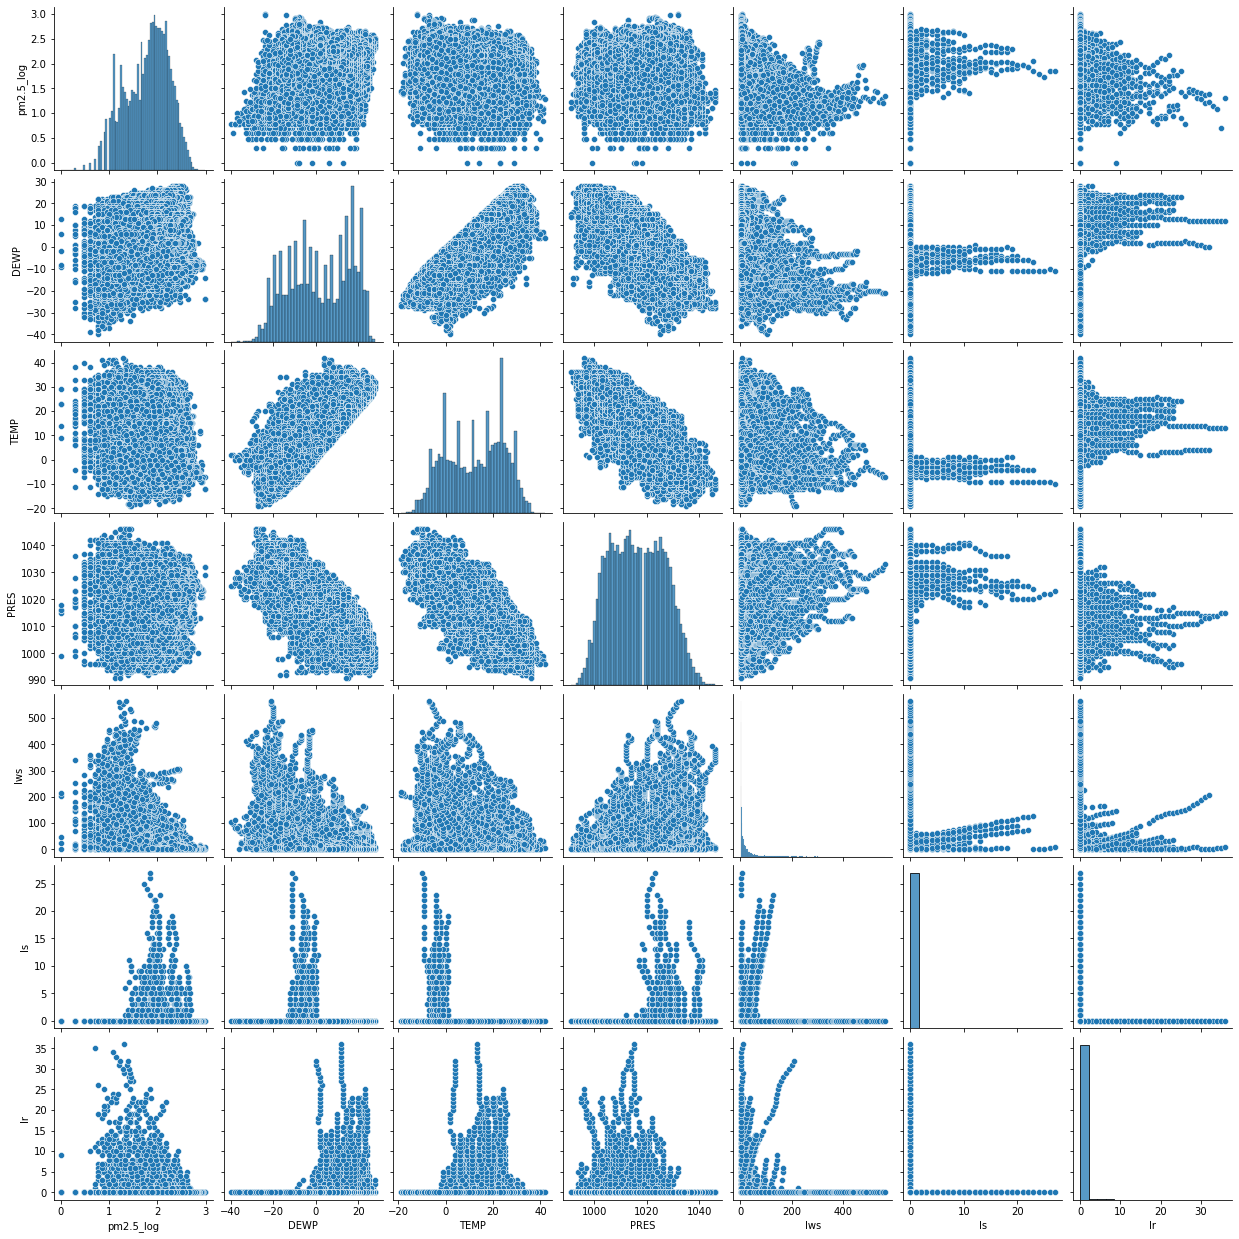

In [36]:
sns.pairplot(df_log[['pm2.5_log', 'DEWP', 'TEMP', 'PRES','Iws', 'Is', 'Ir']])

In [37]:
df_log[df_log['Is'] ==0]

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5_log
time,,,,,,,,
2010-01-02 00:00:00,-16,-4.0,1020.0,SE,1.79,0,0,2.110590
2010-01-02 01:00:00,-15,-4.0,1020.0,SE,2.68,0,0,2.170262
2010-01-02 02:00:00,-11,-5.0,1021.0,SE,3.57,0,0,2.201397
2010-01-02 07:00:00,-7,-5.0,1024.0,SE,10.72,0,0,2.093422
2010-01-02 08:00:00,-8,-6.0,1024.0,SE,12.51,0,0,2.079181
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-23,-2.0,1034.0,NW,231.97,0,0,0.903090
2014-12-31 20:00:00,-22,-3.0,1034.0,NW,237.78,0,0,1.000000
2014-12-31 21:00:00,-22,-3.0,1034.0,NW,242.70,0,0,1.000000


In [38]:
df_log[df_log['Ir']==0]

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5_log
time,,,,,,,,
2010-01-02 00:00:00,-16,-4.0,1020.0,SE,1.79,0,0,2.110590
2010-01-02 01:00:00,-15,-4.0,1020.0,SE,2.68,0,0,2.170262
2010-01-02 02:00:00,-11,-5.0,1021.0,SE,3.57,0,0,2.201397
2010-01-02 03:00:00,-7,-5.0,1022.0,SE,5.36,1,0,2.257679
2010-01-02 04:00:00,-7,-5.0,1022.0,SE,6.25,2,0,2.139879
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-23,-2.0,1034.0,NW,231.97,0,0,0.903090
2014-12-31 20:00:00,-22,-3.0,1034.0,NW,237.78,0,0,1.000000
2014-12-31 21:00:00,-22,-3.0,1034.0,NW,242.70,0,0,1.000000


In [39]:
df_log=df_log.drop(['Is','Ir'], axis=1)

In [40]:
df_log['TEMP'] = np.log10(df_log['TEMP'])

C:\Users\Simka\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Simka\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


From the heatmap we can see that dew point, temperature and pressure are higly correlated, so if we include all of them in the model we will have multicollinearity. Because PM2.5 is highly correlated with dew point, we will keep that column for the model, and the other two we will drop.

# Create dummy variables

In [41]:
df_nums = df_log.select_dtypes(exclude='object')
df_objs = df_log.select_dtypes(include='object')

In [42]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [43]:
df_final = pd.concat([df_nums,df_objs],axis=1)

In [44]:
df_final.head()

,DEWP,TEMP,PRES,Iws,pm2.5_log,cbwd_NW,cbwd_SE,cbwd_cv
time,,,,,,,,
2010-01-02 00:00:00,-16,NaN,1020.0,1.79,2.110590,0,1,0
2010-01-02 01:00:00,-15,NaN,1020.0,2.68,2.170262,0,1,0
2010-01-02 02:00:00,-11,NaN,1021.0,3.57,2.201397,0,1,0
2010-01-02 03:00:00,-7,NaN,1022.0,5.36,2.257679,0,1,0
2010-01-02 04:00:00,-7,NaN,1022.0,6.25,2.139879,0,1,0


# Create training and testing sets

In [45]:
X = df_final.drop('pm2.5_log',axis=1)
y = df_final['pm2.5_log']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(scaled_X_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print('R-squared score (training): {:.3f}'
     .format(linear_reg_model.score(scaled_X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linear_reg_model.score(scaled_X_test, y_test)))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_reg_model,scaled_X_train,y_train,
                         scoring='r2',cv=10)
scores.mean()